In [4]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [10]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size)

In [13]:
# 简单实现
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 在优化器中实现权重衰退，防止过拟合
    trainer = torch.optim.SGD([{
        'params': net[0].weight,
        # wd 类似于lamda
        'weight_decay': wd}, {
        'params': net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数: ', net[0].weight.norm().item())

w的L2范数:  13.602952003479004


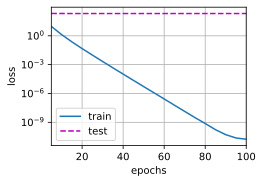

In [14]:
train_concise(0)

w的L2范数:  0.33748486638069153


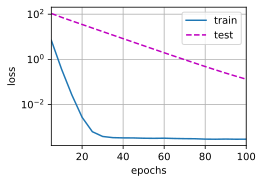

In [15]:
train_concise(3)

w的L2范数:  0.050714101642370224


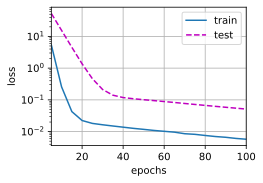

In [16]:
train_concise(10)

w的L2范数:  0.007488987408578396


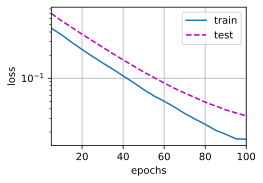

In [17]:
train_concise(100)